# PCA 실습

## 차원 축소에서 pca와 svd란?

차원 축소에서 PCA와 SVD는 모두 고차원 데이터를 저차원 데이터로 변환하는 데 사용되는 중요한 기법입니다. 하지만 접근 방식과 특징에서 차이가 있습니다. 둘 다 데이터의 주요 정보를 유지하면서 차원을 줄여 시각화, 분석, 머신러닝 모델 학습 등에 도움을 줍니다.

## SVD

SVD는 특이값 분해(Singular Value Decomposition) 의 약자입니다. SVD는 선형대수학에서 중요한 개념으로, 어떤 행렬이든 세 개의 특수한 행렬의 곱으로 분해하는 것을 말합니다. 마치 숫자 12를 3 x 4로 분해하는 것과 비슷하지만, 행렬의 세계에서는 좀 더 특별한 의미를 가집니다.

### SVD의 정의

m x n 크기의 행렬 M을 SVD를 통해 분해하면 다음과 같이 표현됩니다.

M = UΣV<sup>T</sup>

- U: m x m 크기의 정규 직교 행렬입니다. U의 열벡터들을 좌 특이 벡터(left singular vectors) 라고 합니다.
- Σ: m x n 크기의 대각 행렬입니다. Σ의 대각선 성분들을 특이값(singular values) 이라고 하며, 이 값들은 항상 0보다 크거나 같습니다.
- V<sup>T</sup>: V 행렬의 전치 행렬입니다. V는 n x n 크기의 정규 직교 행렬입니다. V의 열벡터들을 우 특이 벡터(right singular vectors) 라고 합니다.

### SVD의 의미

SVD는 행렬을 세 개의 행렬로 분해하여 원래 행렬의 핵심적인 정보를 추출하고 구조를 분석하는 데 유용하게 쓰입니다.  특이값은 행렬의 중요한 특징을 나타내는데, 큰 특이값에 해당하는 특이 벡터들은 원래 행렬의 주요 정보를 담고 있습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix, numbers=True, size_scale=0.7):
  n_rows, n_cols = matrix.shape
  fig, axes = plt.subplots(figsize=(n_cols * size_scale, n_rows * size_scale))

  v_args = dict(cmap='Purples', cbar=False, xticklabels=False, yticklabels=False)
  sns.heatmap(matrix, annot=numbers, fmt='.2f', linewidths=.5, **v_args)

In [2]:
np.random.seed(1234)

M = np.random.randn(6, 9)
M

array([[ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00,
        -3.12651896e-01, -7.20588733e-01,  8.87162940e-01,
         8.59588414e-01, -6.36523504e-01,  1.56963721e-02],
       [-2.24268495e+00,  1.15003572e+00,  9.91946022e-01,
         9.53324128e-01, -2.02125482e+00, -3.34077366e-01,
         2.11836468e-03,  4.05453412e-01,  2.89091941e-01],
       [ 1.32115819e+00, -1.54690555e+00, -2.02646325e-01,
        -6.55969344e-01,  1.93421376e-01,  5.53438911e-01,
         1.31815155e+00, -4.69305285e-01,  6.75554085e-01],
       [-1.81702723e+00, -1.83108540e-01,  1.05896919e+00,
        -3.97840228e-01,  3.37437654e-01,  1.04757857e+00,
         1.04593826e+00,  8.63717292e-01, -1.22091575e-01],
       [ 1.24712954e-01, -3.22794806e-01,  8.41674713e-01,
         2.39096052e+00,  7.61995878e-02, -5.66445930e-01,
         3.61419367e-02, -2.07497760e+00,  2.47792200e-01],
       [-8.97156784e-01, -1.36794833e-01,  1.82891913e-02,
         7.55413982e-01,  2.15268581e-01,  8.410087

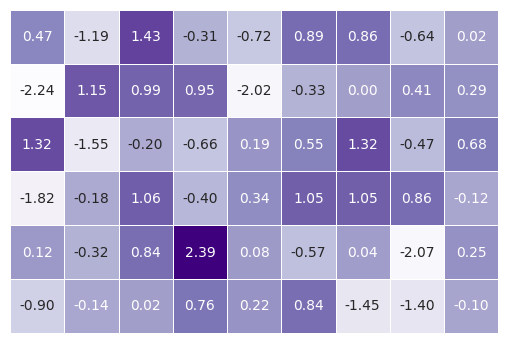

In [3]:
plot_matrix(M)

In [4]:
U, s, V = np.linalg.svd(M)
print(U.shape, s.shape, V.shape)

(6, 6) (6,) (9, 9)


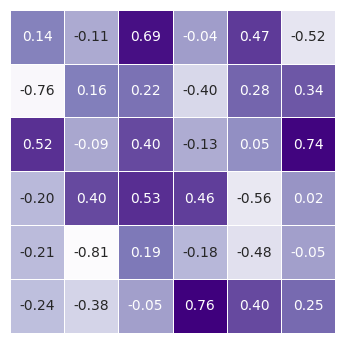

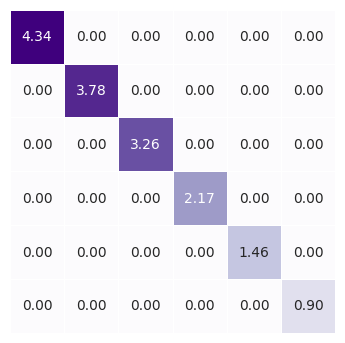

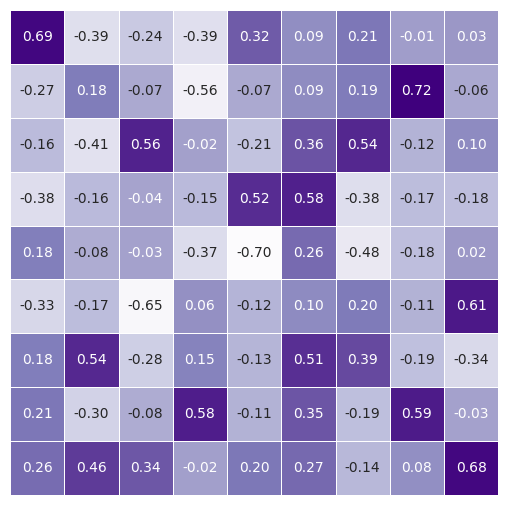

In [5]:
plot_matrix(U)
plot_matrix(np.diag(s))
plot_matrix(V)

In [6]:
def full_svd(matrix):
  U, s, V = np.linalg.svd(matrix)

  m, n = matrix.shape
  sigma = np.zeros((m, n))

  rank = len(s)
  sigma[:rank, :rank] = np.diag(s)

  return U, sigma, V.T

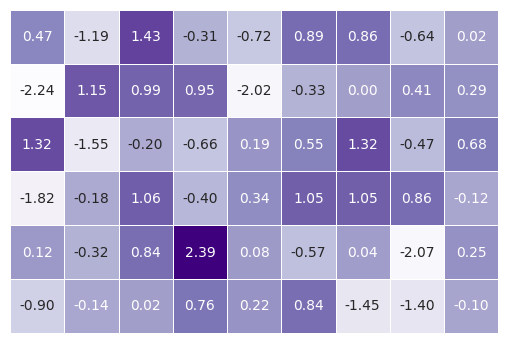

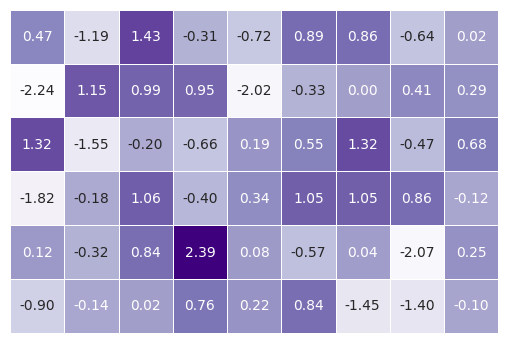

In [7]:
U, Sigma, V = full_svd(M)
plot_matrix(M)
plot_matrix(U @ Sigma @ V.T)

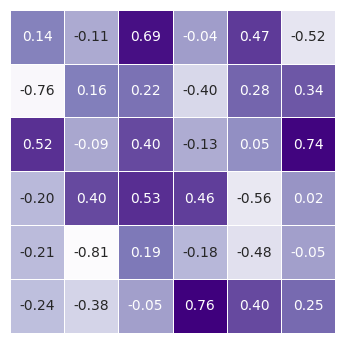

In [8]:
plot_matrix(U)

In [9]:
# 행렬의 서로 다른 row를 골라 내적하면 0이 나옵니다
print(U[1] @ U[3])
print(U[1] @ U[4])
print(U[2] @ U[5])
print(V[1] @ V[3])
print(V[1] @ V[4])
print(V[1] @ V[5])

-4.631711680858075e-16
-9.020562075079397e-17
8.326672684688674e-17
-5.551115123125783e-17
-2.8449465006019636e-16
-1.1102230246251565e-16


In [10]:
# 자기 자신과의 내적(벡터의 norm, 길이라고 생각할 수 있는 개념)은 항상 1이 나옵니다
print(U[1] @ U[1])
print(U[2] @ U[2])
print(U[3] @ U[3])

0.9999999999999997
1.0000000000000002
0.9999999999999999


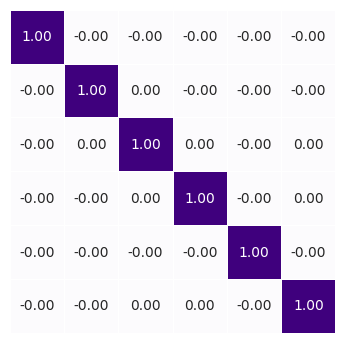

In [11]:
plot_matrix(U @ U.T)

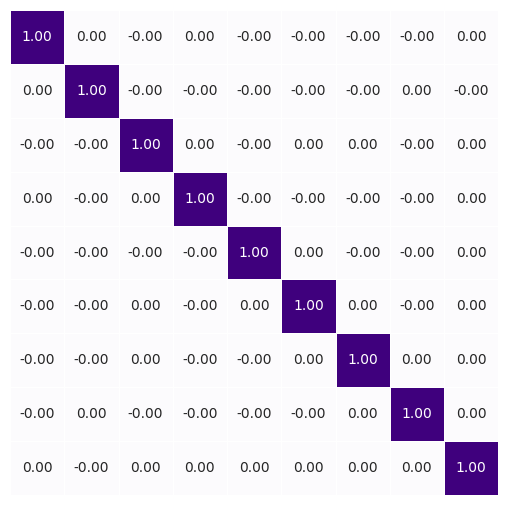

In [12]:
plot_matrix(V @ V.T)

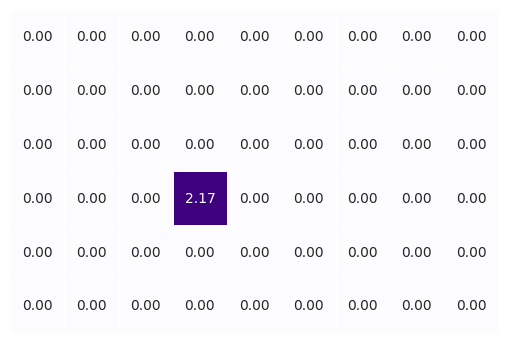

In [13]:
def select_diag(sigma, k):
  result = np.zeros_like(sigma)
  result[k, k] = sigma[k, k]
  return result

sigma_k = select_diag(Sigma, 3)
plot_matrix(sigma_k)

Maximum diff:  2.220446049250313e-15


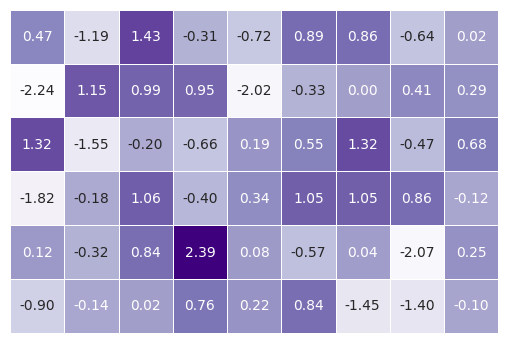

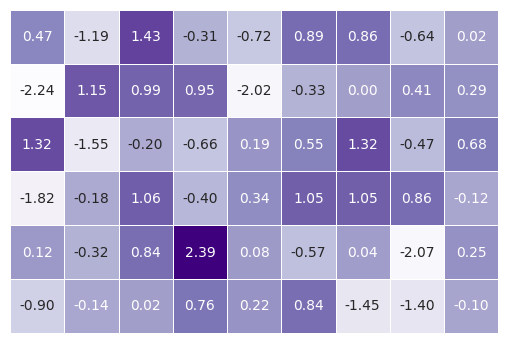

In [14]:
r = np.linalg.matrix_rank(M)

result = np.zeros_like(M)
for k in range(r):
  sigma_k = select_diag(Sigma, k)
  result += U @ sigma_k @ V.T

print("Maximum diff: ", np.abs(M - result).max())
plot_matrix(M)
plot_matrix(result)

Maximum diff:  2.220446049250313e-15


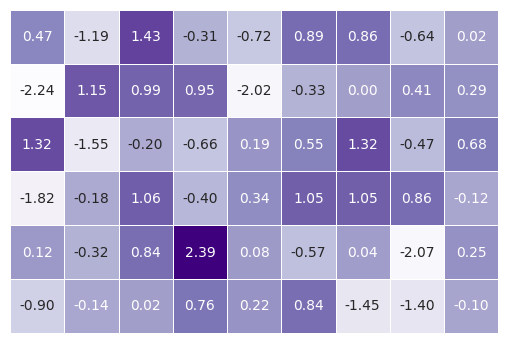

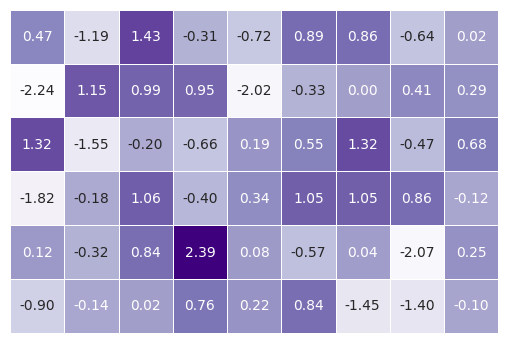

In [15]:
def col_vec(matrix, k):
  return matrix[:, [k]]

r = np.linalg.matrix_rank(M)

result = np.zeros_like(M)
for k in range(r):
  sig_k = Sigma[k, k]
  result += sig_k * col_vec(U, k) @ col_vec(V, k).T

print("Maximum diff: ", np.abs(M - result).max())
plot_matrix(M)
plot_matrix(result)

### Rank-1 matrix

두 벡터의 곱으로 표현되는 행렬은 선형대수학에서 rank-1 matrix라고 부르는 개념으로, 크기는 행렬이지만 가지고 있는 정보량은 곱해지는 벡터 두 개와 동일하다는 특성을 가지며, 행렬을 만드는 기본단위처럼 사용되는 개념입니다.

gemini: 단 하나의 독립적인 행 또는 열 벡터로 표현할 수 있는 행렬을 의미합니다. 즉, 모든 행(또는 열) 벡터가 서로 선형적으로 종속적인 행렬입니다.

(6, 1)
(1, 9)
(6, 9)
1


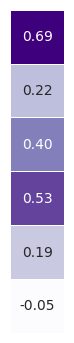

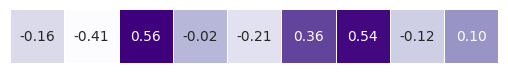

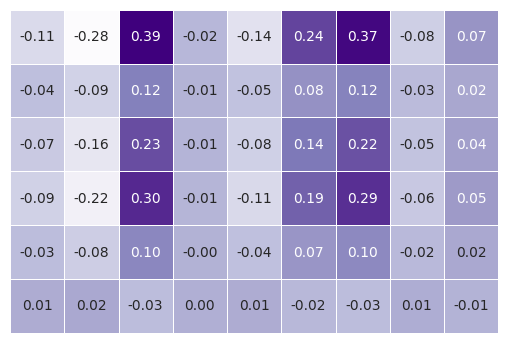

In [23]:
k = 2

print(col_vec(U, k).shape)
plot_matrix(col_vec(U, k))

print(col_vec(V, k).T.shape)
plot_matrix(col_vec(V, k).T)

rank1_mat = col_vec(U, k) @ col_vec(V, k).T
print(rank1_mat.shape)
print(np.linalg.matrix_rank(rank1_mat))
plot_matrix(rank1_mat)